<a href="https://colab.research.google.com/github/anisfreelancer71/mycode/blob/main/CLEANSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/My Drive/filecsv'

 creditcard.csv		       'Sales_June_2019 (1).csv'
 data_harga_rumah.csv	        Sales_June_2019.csv
'Financials (1).csv'	       'Sales_March_2019 (1).csv'
'Financials (2).csv'	        Sales_March_2019.csv
'Financials (3).csv'	       'Sales_May_2019 (1).csv'
 Financials.csv		       'Sales_May_2019 (2).csv'
 lc_2016_2017.csv	        Sales_May_2019.csv
 Sales_April_2019.csv	       'Sales_November_2019 (1).csv'
 Sales_August_2019.csv	        Sales_November_2019.csv
'Sales_December_2019 (1).csv'  'Sales_October_2019 (1).csv'
 Sales_December_2019.csv       'Sales_October_2019 (2).csv'
 Sales_February_2019.csv        Sales_October_2019.csv
'Sales_January_2019 (1).csv'    Sales_September_2019.csv
 Sales_January_2019.csv         shopping_data.csv
 Sales_July_2019.csv


In [13]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/filecsv/shopping_data.csv')
data_df = pd.DataFrame(data)
print('Shopping Data :\n', data_df.head())

Shopping Data :
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [19]:
data_df.value_counts(['Genre']) #mengitung unik dari kolom

Genre 
Female    112
Male       88
dtype: int64

In [21]:
data_df['Genre'] = data_df['Genre'].replace({'Female':0, 'Male':1}) # mengganti nilai
data_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [24]:
data_df.dropna(inplace=True) # menghapus nilai NAN
data_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [25]:
data_df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


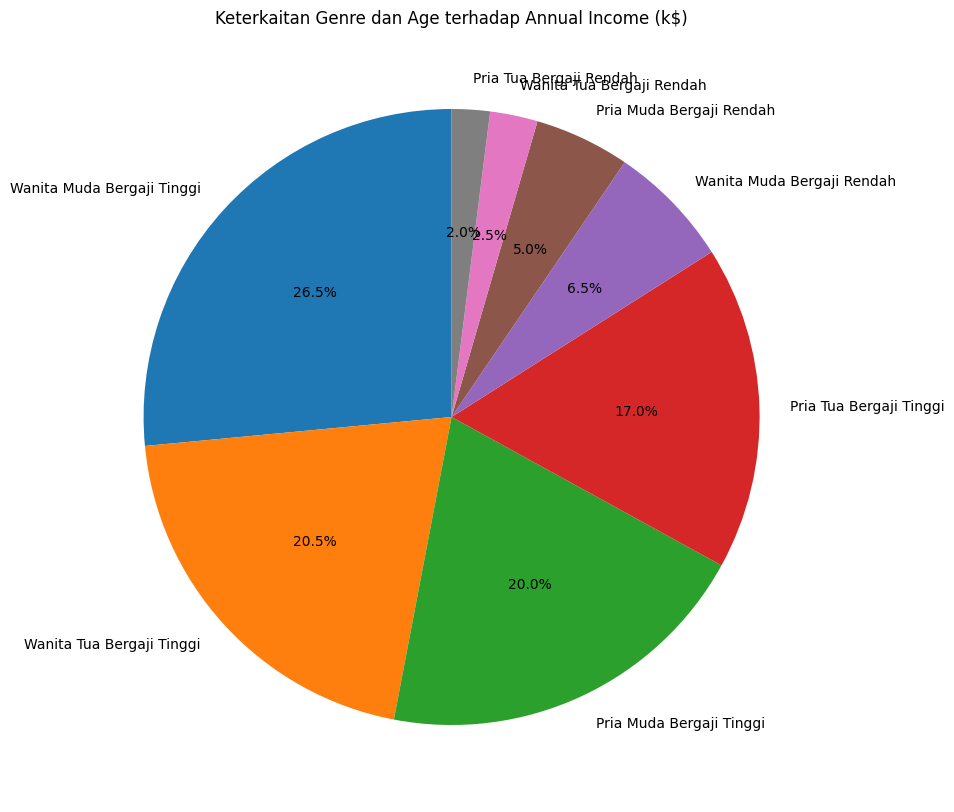

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'data_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Membuat kategori berdasarkan kondisi yang telah Anda sebutkan
def create_category(row):
    if row['Genre'] == 0:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Muda Bergaji Tinggi'
            else:
                return 'Wanita Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Tua Bergaji Tinggi'
            else:
                return 'Wanita Tua Bergaji Rendah'
    else:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Muda Bergaji Tinggi'
            else:
                return 'Pria Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Tua Bergaji Tinggi'
            else:
                return 'Pria Tua Bergaji Rendah'

# Menambahkan kolom 'Kategori' ke DataFrame berdasarkan kondisi
data_df['Kategori'] = data_df.apply(create_category, axis=1)

# Menghitung jumlah data dalam setiap kategori
category_counts = data_df['Kategori'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Keterkaitan Genre dan Age terhadap Annual Income (k$)')

plt.show()



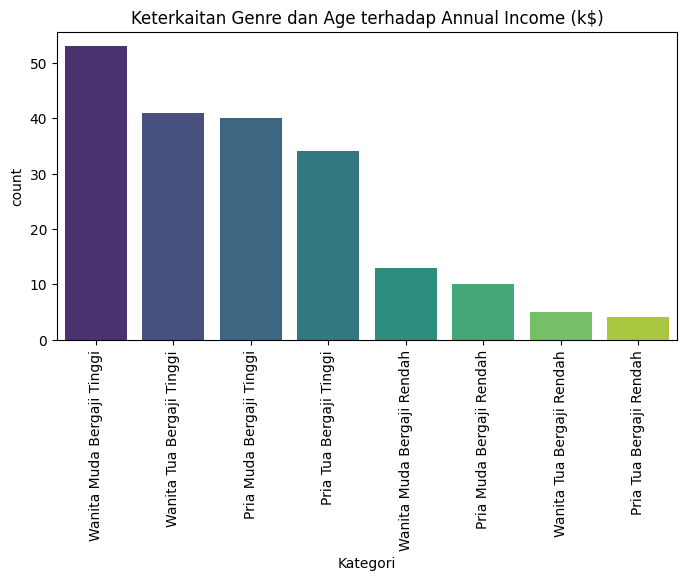

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'data_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Membuat kategori berdasarkan kondisi yang telah Anda sebutkan
def create_category(row):
    if row['Genre'] == 0:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Muda Bergaji Tinggi'
            else:
                return 'Wanita Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Tua Bergaji Tinggi'
            else:
                return 'Wanita Tua Bergaji Rendah'
    else:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Muda Bergaji Tinggi'
            else:
                return 'Pria Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Tua Bergaji Tinggi'
            else:
                return 'Pria Tua Bergaji Rendah'

# Menambahkan kolom 'Kategori' ke DataFrame berdasarkan kondisi
data_df['Kategori'] = data_df.apply(create_category, axis=1)

# Menggunakan Seaborn untuk membuat grafik batang
plt.figure(figsize=(8, 4))
sns.countplot(data=data_df, x='Kategori', order=data_df['Kategori'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Keterkaitan Genre dan Age terhadap Annual Income (k$)')

plt.show()

